<a href="https://colab.research.google.com/github/koushik395/TwitterSentimentAnalysis/blob/main/SentimentAnalysisWithTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis using Twitter API.

### Install Tweepy package to connect with the Twitter API. 

In [127]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install the TextBlob package to perform the sentiment analysis.

In [128]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import the neccessary Modules

In [129]:
import re
import tweepy as tw
from textblob import TextBlob
import pandas as pd

### Import the NLTK toolkit and download the stopwords.

In [130]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Give the neccessary keys and access Tokens to login and perform actions using the twitter api.

**For more information on how to get the keys and access tokens refer the Readme.md file**.

In [131]:
api = "6BTKfO7ssq9XroqgvxEzex47u"
secretapi = "HMWNzLhcaQphXi5249oxdjon7hBxlqtAVNc96qKTIXaI8ZYyk8"
access_token ="1508746915361423362-P3U4DpvxJuNlZAonj5zMXMLteBo5mu"
access_token_secret ="uAjokmGo8ieO783bWxBcQE6W1UiWFj9rZswTGTH499tza"

### Connect to the twitter API.

In [132]:
try:
    # create OAuthHandler object
    auth = tw.OAuthHandler(api, secretapi)
    # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets
    api = tw.API(auth)
    print("Authentication Successfull!!!")
except:
    print("Error: Authentication Failed")

Authentication Successfull!!!


### Retrieve the twitter tweets according to the keyword given.

In [133]:
keyword = 'RRRforOscars'
limit=100
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended').items(500)

columns = ['Time','User','Tweet']
data = []
count=0
for tweet in fetched_tweets:
  data.append([tweet.created_at,tweet.user.screen_name,tweet.full_text])

df = pd.DataFrame(data,columns = columns )
df

,Time,User,Tweet
0,2023-01-09 11:11:39,kumar_tarakian,RT @_kavya_18_: Jr NTR for best actor for his...
1,2023-01-09 11:11:27,Tarak_Tweeter,RT @Marshy00: Thrilled by the response to this...
2,2023-01-09 11:11:16,vadamodularamu2,RT @RamaRajuuRC: #RamCharan name crowd Respons...
3,2023-01-09 11:10:37,sunilreddy45sr,RT @TweetRamCharan: MonsteRRR 🔥\n#RRRForOscars...
4,2023-01-09 11:10:14,PittuVenkaiah,RT @TweetRamCharan: MonsteRRR 🔥\n#RRRForOscars...
...,...,...,...
495,2023-01-09 08:58:30,srikanth_c7,RT @Harsh___07__: Konidela Ram Charan Teja..!🤩...
496,2023-01-09 08:57:43,ntr9999_kumarD,RT @NTRFanTrends: English Accent &amp; Timing ...
497,2023-01-09 08:57:19,Sandeep83822122,RT @Malmovies1: I am so glad to see the ovatio...
498,2023-01-09 08:57:12,Srikanth999911,RT @thestaRRR78: I Always Loved the way Jakkan...


### Cleaning the Tweets.

In [134]:
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    stop_words = nltk.corpus.stopwords.words('english')
    token=re.sub("RT|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).lower().split()
    filtered_sentence = []
 
    for w in token:
      if w not in stop_words:
        filtered_sentence.append(w)

    text1=" ".join(filtered_sentence)
    return text1

### Function to return the sentiment of a tweet

In [135]:
def get_tweet_sentiment(tweet,parsed_tweet):
    '''
    Function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    parsed_tweet['polarity'] = analysis.sentiment.polarity
    parsed_tweet['subjectivity'] = analysis.sentiment.subjectivity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

### Program to store the cleaned tweet and sentiment into a dictionary.

In [136]:
tweets = []
# parsing tweets one by one
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended',lang="en").items(500)
for tweet in fetched_tweets:
  # empty dictionary to store required params of a tweet
  parsed_tweet = {}
 
  # saving text of tweet
  parsed_tweet['cleaned_text'] = clean_tweet(tweet.full_text)
  # saving sentiment of tweet
  parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.full_text,parsed_tweet)
  # appending parsed tweet to tweets list
  if tweet.retweet_count > 0:
    # if tweet has retweets, ensure that it is appended only once
    if parsed_tweet not in tweets:
        tweets.append(parsed_tweet)
  else:
    tweets.append(parsed_tweet)
 
  # return parsed tweets
for i in range(5):
  print(tweets[i],"\n")

{'cleaned_text': 'kavya18 jr ntr best actor powerhouse performancerrrforoscars ntrforoscars rrrmoive manofmassesntr', 'polarity': 1.0, 'subjectivity': 0.3, 'sentiment': 'positive'} 

{'cleaned_text': 'thrilled response video far diehard rrr fans havent checked yet please take', 'polarity': 0.35, 'subjectivity': 0.85, 'sentiment': 'positive'} 

{'cleaned_text': 'ramcharan name crowd response rrr rrrforoscars ramcharan ramcharanmaniainusa ramcharanforgoldeng', 'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'neutral'} 

{'cleaned_text': 'monsterrr rrrforoscars', 'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'neutral'} 

{'cleaned_text': 'boxoffic character impressed morelets settle rrrforoscars rrrmovie', 'polarity': 1.0, 'subjectivity': 1.0, 'sentiment': 'positive'} 



### Finding the percentage of positive,negative and nuetral tweets.

In [137]:
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
perc_ptweets = 100*len(ptweets)/len(tweets)
print("Positive tweets percentage: {} %".format(perc_ptweets))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
perc_ntweets = 100*len(ntweets)/len(tweets)
print("Negative tweets percentage: {} %".format(perc_ntweets))
# percentage of neutral tweets
perc_neutweets =100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)
print("Print Nuetral Tweets percentage :{} %".format(perc_neutweets))

Positive tweets percentage: 44.927536231884055 %
Negative tweets percentage: 5.797101449275362 %
Print Nuetral Tweets percentage :49.27536231884058 %


In [138]:
df1 = pd.DataFrame.from_dict(tweets)
df1

,cleaned_text,polarity,subjectivity,sentiment
0,kavya18 jr ntr best actor powerhouse performan...,1.000000,0.300000,positive
1,thrilled response video far diehard rrr fans h...,0.350000,0.850000,positive
2,ramcharan name crowd response rrr rrrforoscars...,0.000000,0.000000,neutral
3,monsterrr rrrforoscars,0.000000,0.000000,neutral
4,boxoffic character impressed morelets settle r...,1.000000,1.000000,positive
...,...,...,...,...
64,rrrmovie 5 nominations houston film critics so...,-0.125000,0.125000,negative
65,nonenglish language film symposium directors f...,0.000000,0.000000,neutral
66,bheem talking naatunaatu amp interval sequence...,0.357143,0.571429,positive
67,global star thank ramcharan rrrforoscars manof...,0.000000,0.000000,neutral


### Visualization

Text(0, 0.5, 'Frequency')

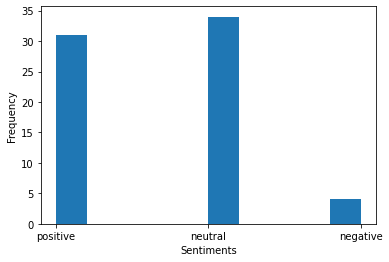

In [139]:
import matplotlib.pyplot as plt
plt.hist(df1['sentiment'])
plt.xlabel('Sentiments')
plt.ylabel('Frequency')

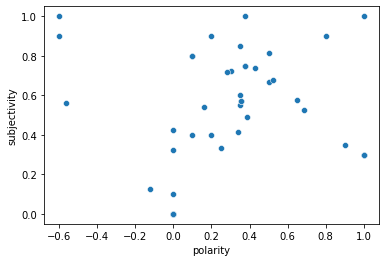

In [140]:
import seaborn as sns
sns.scatterplot(x='polarity',y='subjectivity',data=df1)

In [141]:
df1['sentiment'].value_counts()

neutral     34
positive    31
negative     4
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7feb4d876fd0>,
 [Text(-1.0997149734613896, 0.025039511672861635, 'Nuetral'),
  Text(1.0769925073829816, -0.22380156174816734, 'Positive'),
  Text(0.1992277330644661, 1.0818078897743324, 'Negative')],
 [Text(-0.5998445309789397, 0.013657915457924526, '49.28'),
  Text(0.5874504585725353, -0.12207357913536399, '44.93'),
  Text(0.10866967258061787, 0.5900770307859994, '5.80')])

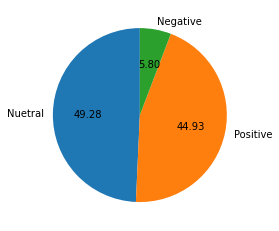

In [143]:
labels = ['Nuetral','Positive','Negative']
values = [perc_neutweets,perc_ptweets,perc_ntweets]
plt.pie(values,labels=labels,startangle=90,autopct='%.2f')

### Visualizing using WordCloud 

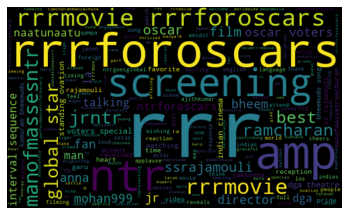

In [144]:
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in df1['cleaned_text']])
wordCloud = WordCloud(width =500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()